
#  **Data analysis**



In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('/home/jupyter/dataset/cali_ces.csv')

# rows and columns of the data
print(data.shape)

print(data.columns)

# visualize the dataset
data.head()

(20640, 10)
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_ces', 'ocean_proximity'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_ces,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
# Check for missing values
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_ces              0
ocean_proximity         0
dtype: int64


In [4]:
# Perform data analysis
print(data.info())
print(data.describe())
# print(data.corr())
# data.ocean_proximity.value_counts()
# pd.get_dummies(data.ocean_proximity)
# pd.pandas.set_option('display.max_columns', None)
# data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_ces          20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532    

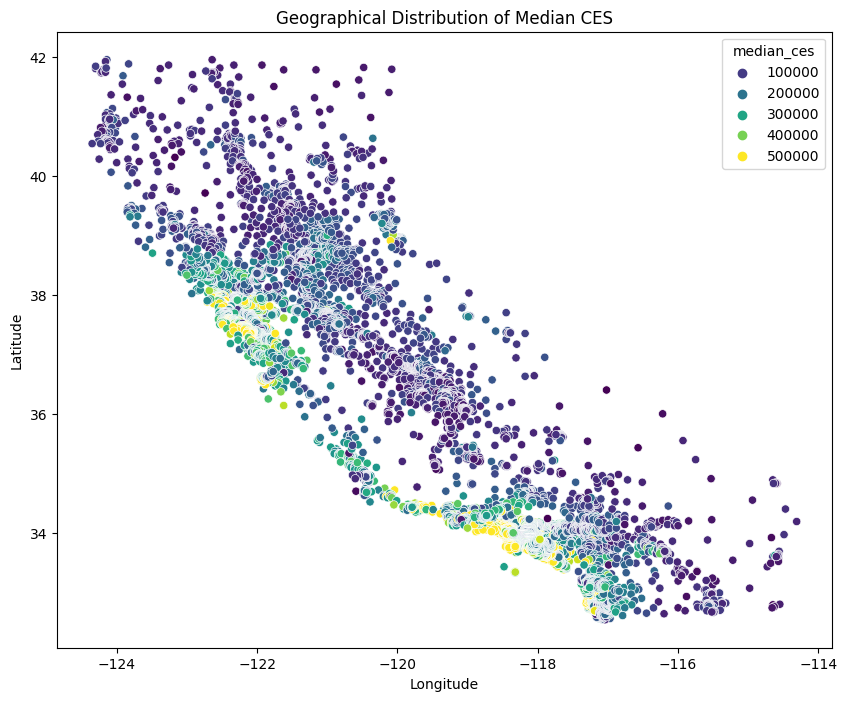

In [5]:
# Step 3: Data Visualization
# Example scatter plot of latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='median_ces', palette='viridis')
plt.title('Geographical Distribution of Median CES')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [6]:
# identifying the categorical variables
# will capture those of type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']
# number of categorical variables
print(len(cat_vars))
# cast all variables as categorical
data[cat_vars] = data[cat_vars].astype('O')
# data[cat_vars]

1


In [7]:
# identify the numerical variables

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'median_ces'
]

# number of numerical variables
print(len(num_vars))

8


# Missing value

In [8]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

total_bedrooms    0.010029
dtype: float64

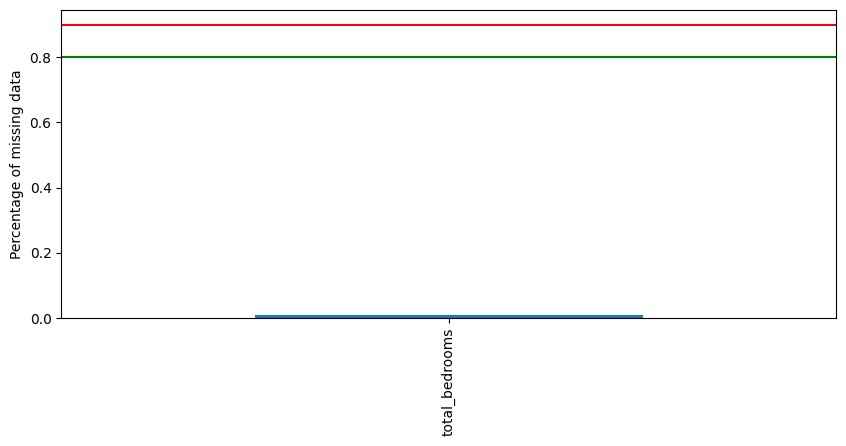

In [9]:
# plot the missing values

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

# Numerical variables

In [10]:
print('Number of numerical variables: ', len(num_vars))

# visualizing the numerical variables
data[num_vars].head()

Number of numerical variables:  8


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462


# Discrete variables

In [11]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if data[var].dtype == 'float64']


print('Number of discrete variables: ', len(discrete_vars))
# visualize the discrete variables

data[discrete_vars].head()

Number of discrete variables:  4


,longitude,latitude,total_bedrooms,median_income
0,-122.23,37.88,129.0,8.3252
1,-122.22,37.86,1106.0,8.3014
2,-122.24,37.85,190.0,7.2574
3,-122.25,37.85,235.0,5.6431
4,-122.25,37.85,280.0,3.8462


# Continuous variables

In [12]:
# list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))
# visualise the continuous variables

data[cont_vars].head()

Number of continuous variables:  4


,housing_median_age,total_rooms,population,households
0,41,880,322,126
1,21,7099,2401,1138
2,52,1467,496,177
3,52,1274,558,219
4,52,1627,565,259


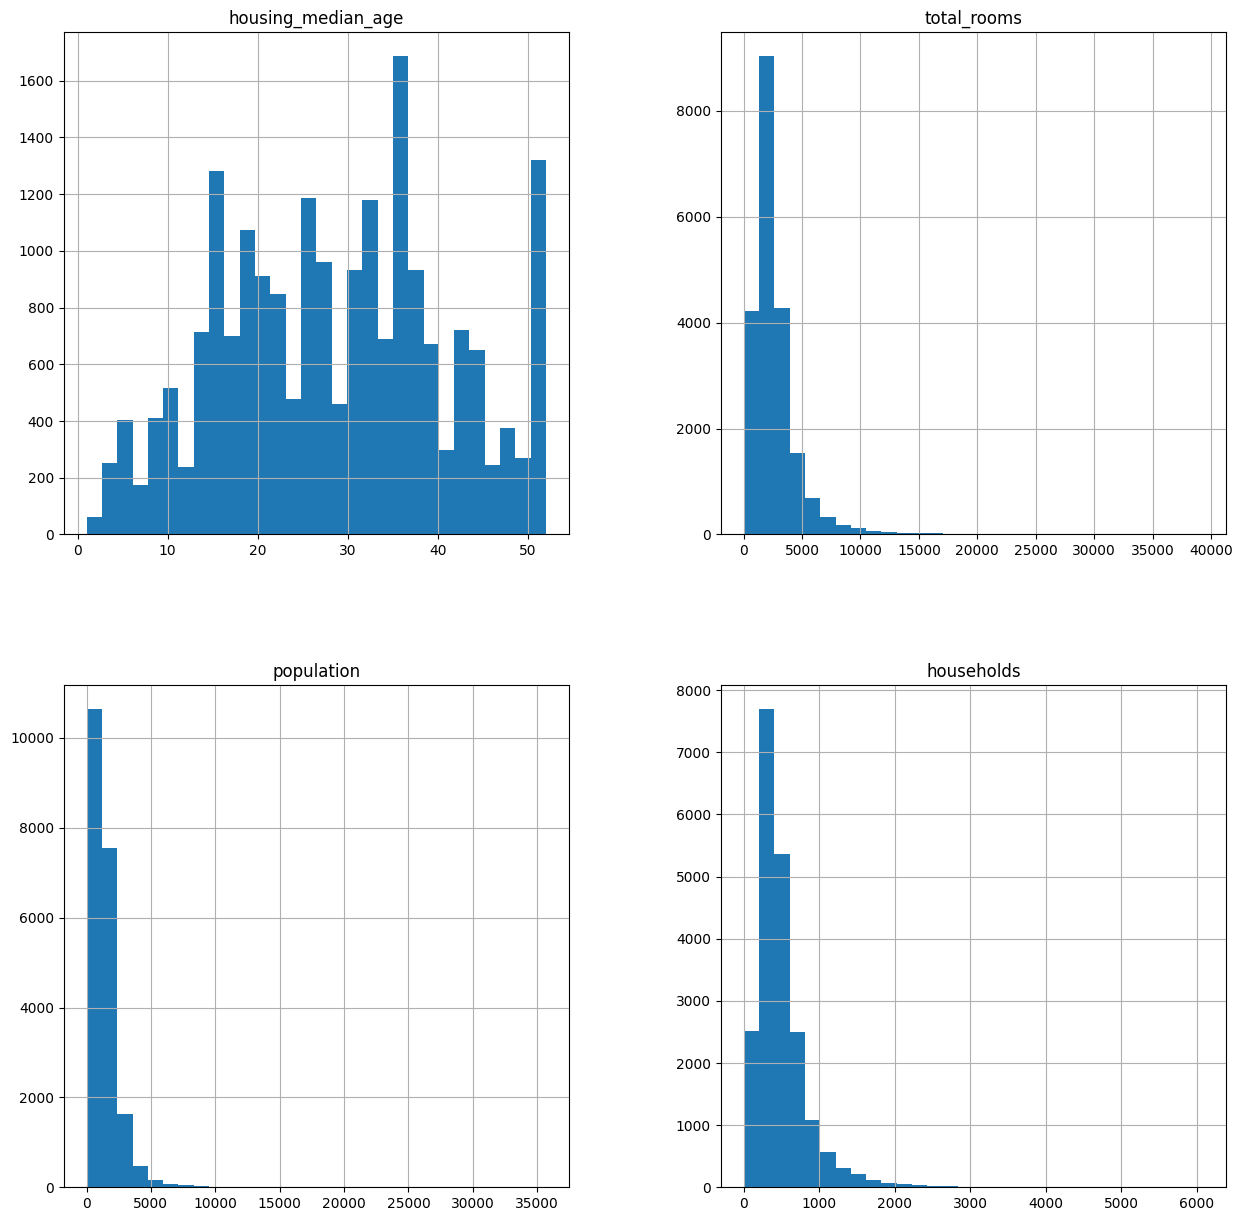

In [13]:
# histograms for all continuous variables

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

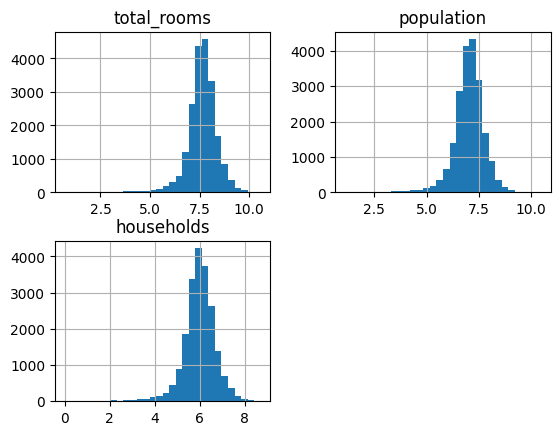

In [25]:
# # applying a logarithmic transformation

# tmp = data.copy()

# for var in ["total_rooms", "population", "households"]:

#     # transform the variable with logarithm
#     tmp[var] = np.log(data[var])
    
# tmp[["total_rooms", "population", "households"]].hist(bins=30)
# plt.show()

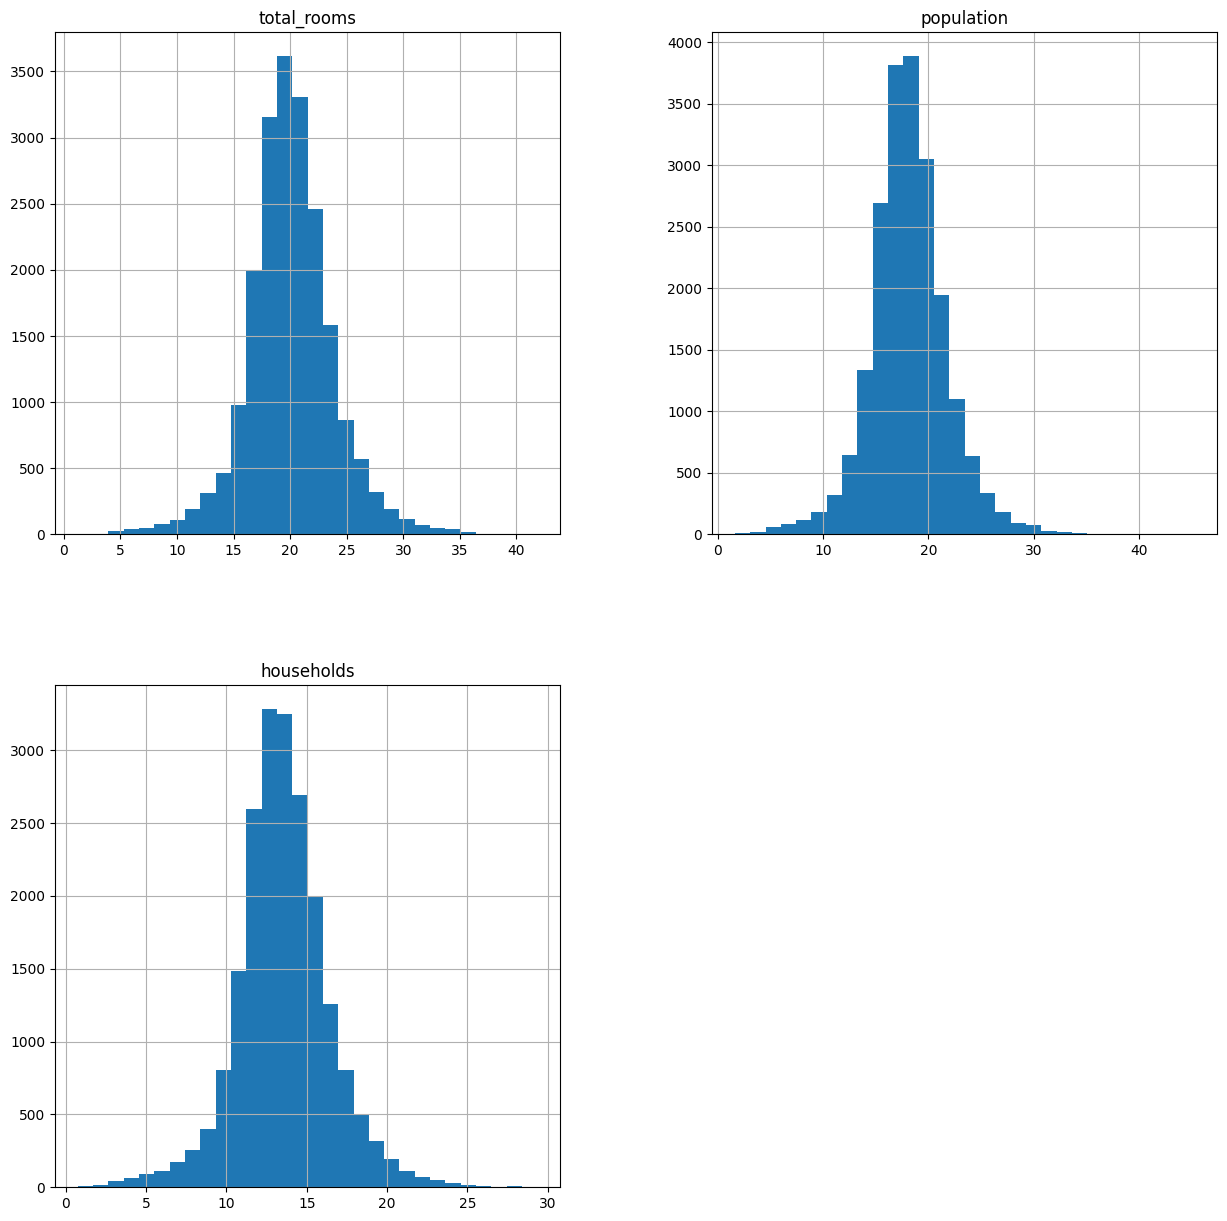

In [14]:
#  applying a yeo-johnson transformation

# temporary copy of the data
tmp = data.copy()
x= ["total_rooms", "population", "households"]
for var in x:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(data[var])

    
# plot the histograms of the transformed variables
tmp[x].hist(bins=30, figsize=(15,15))
plt.show()

# Categorical variables

In [15]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  1


In [16]:
data[cat_vars].head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


# Number of labels: cardinality

<Axes: >

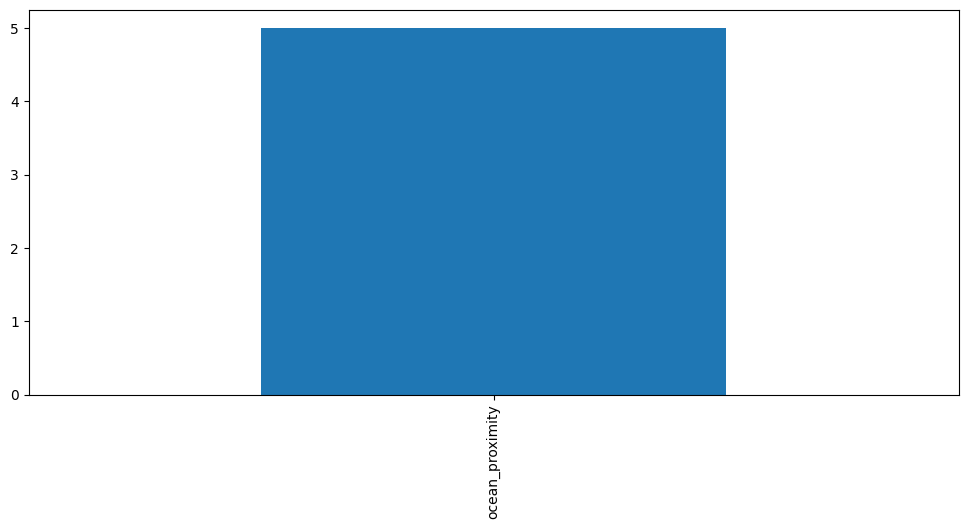

In [17]:
# count unique categories with pandas unique() 
# plot them in descending order

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [18]:
# Perform feature engineering
# Create a new feature "total_rooms_per_person"
data['total_rooms_per_person'] = data['total_rooms']/data['population']
# Create a new feature "bedrooms_per_room"
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
# Create a new feature "income_per_person"
data['income_per_person'] = data['median_income']/data['population']

data.ocean_proximity.value_counts()
pd.get_dummies(data.ocean_proximity)

# data = pd.get_dummies(data, columns=['ocean_proximity'])

# Convert the 'ocean_proximity' column to a categorical type
# data['ocean_proximity'] = data['ocean_proximity'].astype('category')

# Create a new DataFrame with dummy variables for the 'ocean_proximity' column
# encoded_data = pd.get_dummies(data, columns=['ocean_proximity'])

# Encode the categorical feature "ocean_proximity"
# data = pd.get_dummies(data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

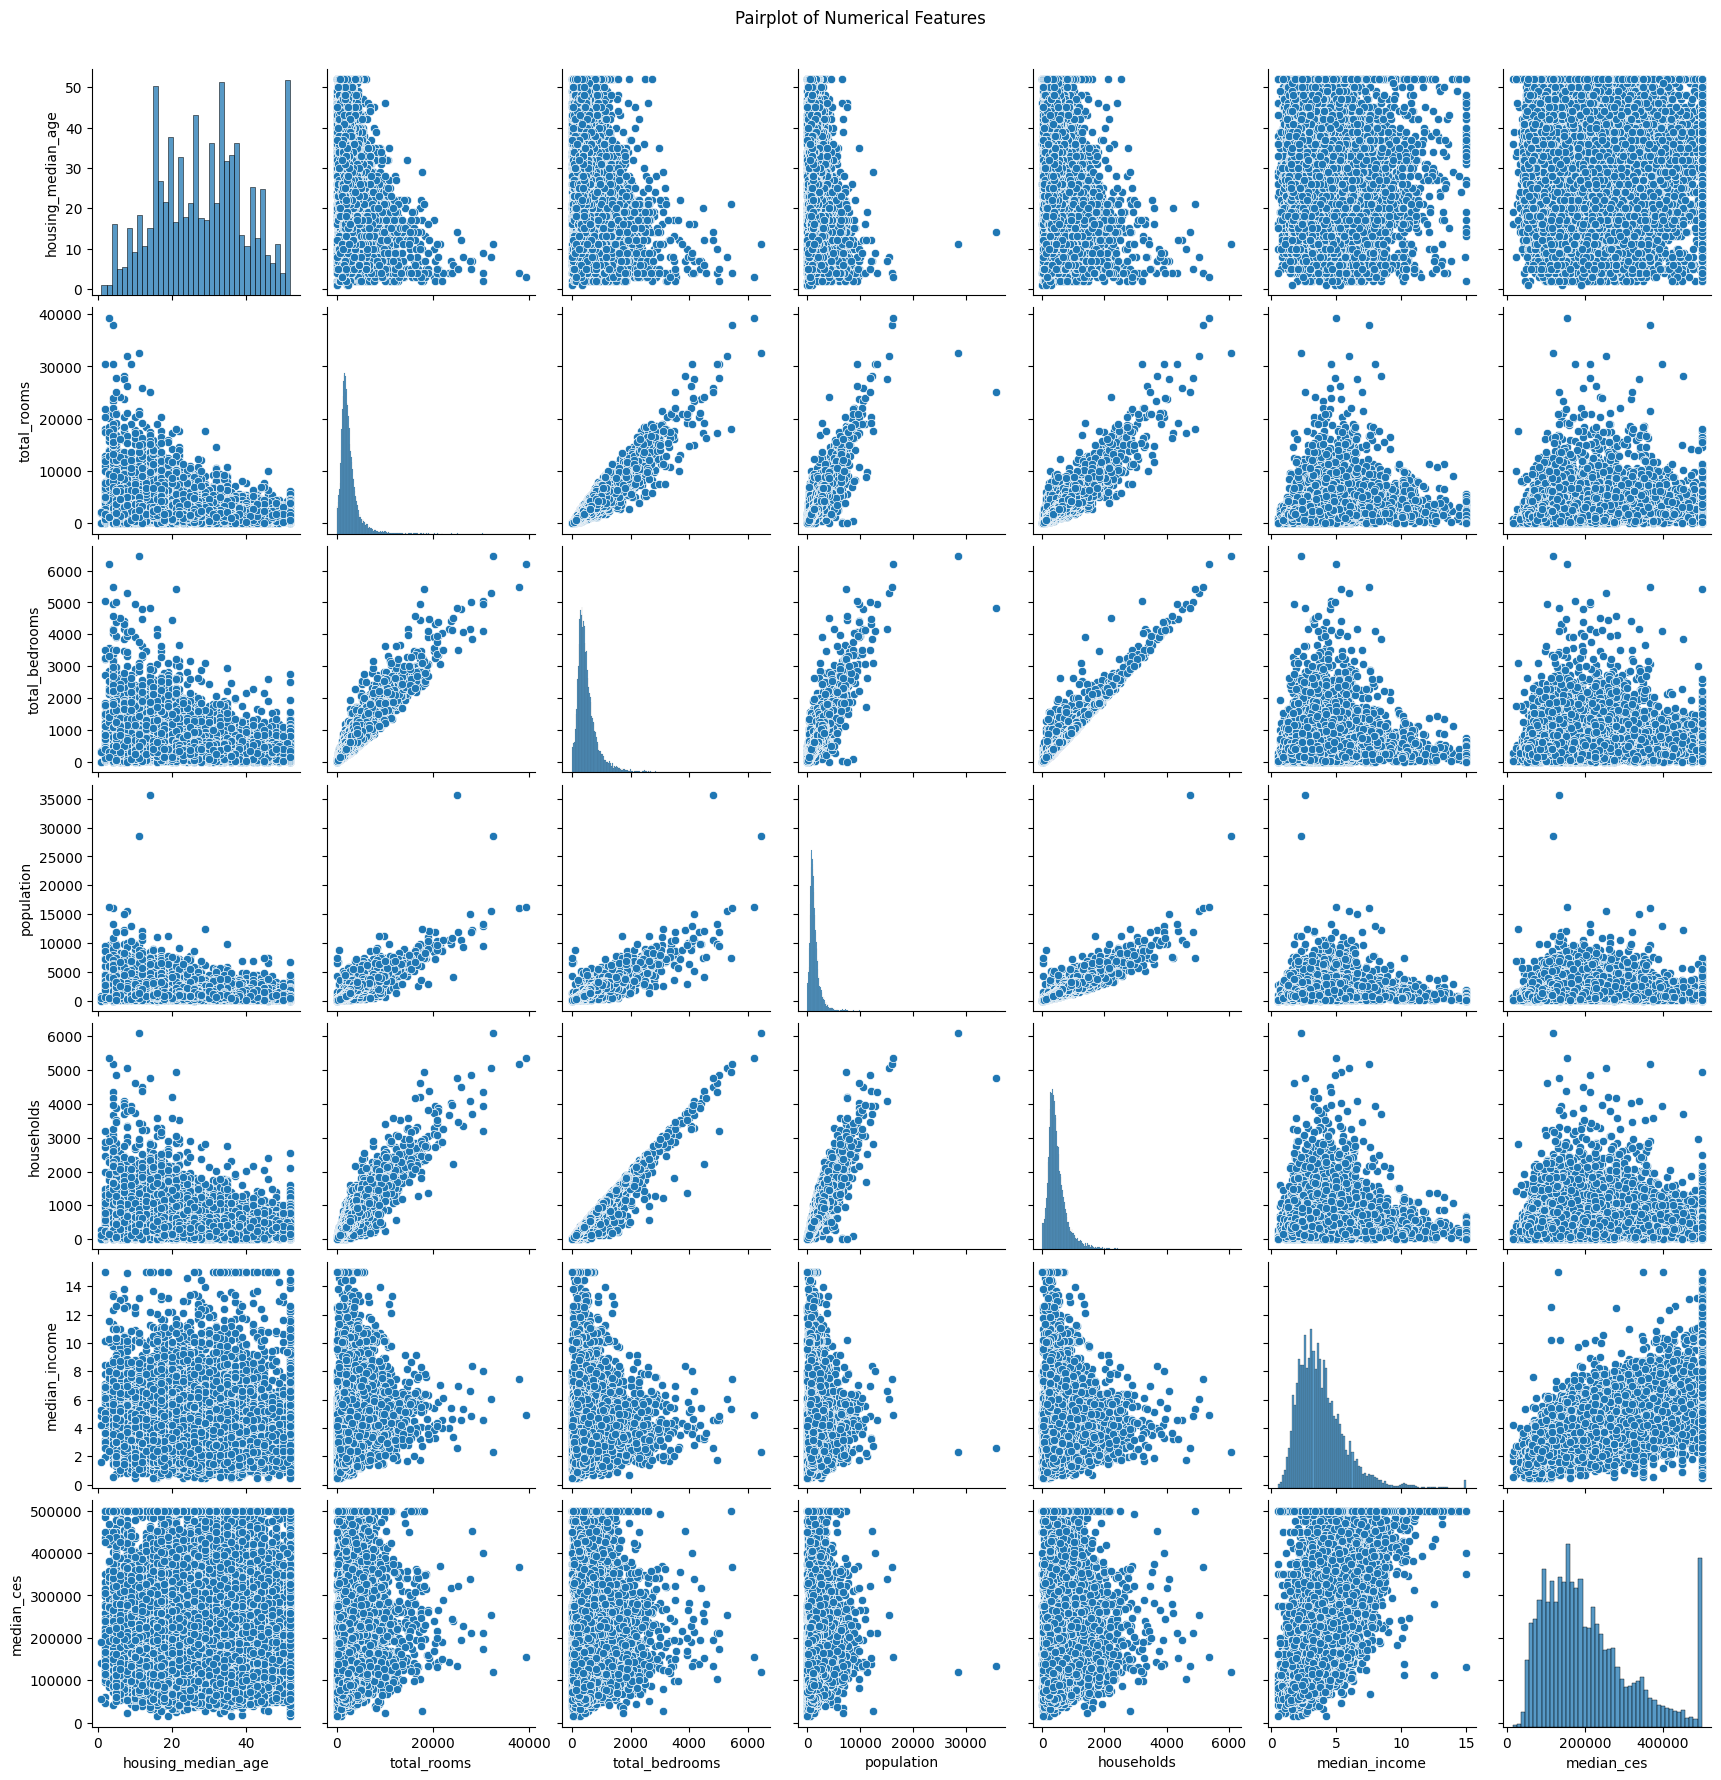

In [19]:
# Pairplot of numerical features
sns.pairplot(data, vars=['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_ces'])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

Target Variable: As per my understanding target variable is CES

In [1]:
# histogran to evaluate target distribution

data['SalePrice'].hist(bins=50, density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()

NameError: name 'data' is not defined